In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # visualization tool

In [25]:
from subprocess import check_output

In [28]:
data = pd.read_csv('countries of the world.csv')

In [29]:
data.info()

## 각 variable에 몇개의 observation이 존재하는지 알려주는 함수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null object
Coastline (coast/area ratio)          227 non-null object
Net migration                         224 non-null object
Infant mortality (per 1000 births)    224 non-null object
GDP ($ per capita)                    226 non-null float64
Literacy (%)                          209 non-null object
Phones (per 1000)                     223 non-null object
Arable (%)                            225 non-null object
Crops (%)                             225 non-null object
Other (%)                             225 non-null object
Climate                               205 non-null object
Birthrate                 

In [30]:
data.corr()

,Population,Area (sq. mi.),GDP ($ per capita)
Population,1.000000,0.469985,-0.039324
Area (sq. mi.),0.469985,1.000000,0.072185
GDP ($ per capita),-0.039324,0.072185,1.000000


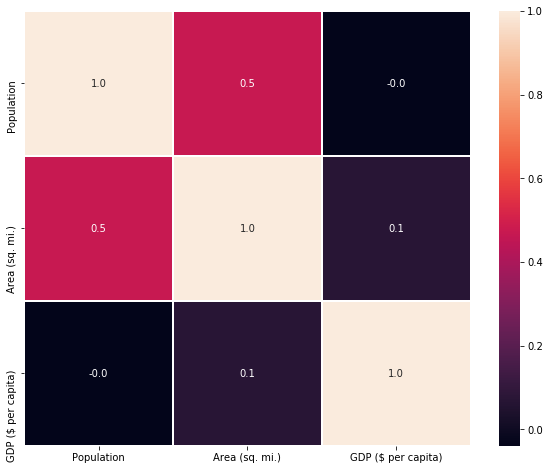

In [38]:
## correlation map
# r에서 corrplot이랑 유사

f,ax = plt.subplots(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)
plt.show()

# annot은 안에 숫자를 나타낸다.
# linewidths는 각 상자들 사이의 줄간격

In [39]:
# columns give all category name like country, region, population etc.
# 각 열들을 보여준다.

data.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [40]:
data.head(10)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,"9,7","0,13",0,"191,19",1900.0,"42,0","7,8","2,41","0,24","97,35",NaN,"45,11","24,2","0,096","0,658","0,246"
6,Anguilla,LATIN AMER. & CARIB,13477,102,"132,1","59,80","10,76","21,03",8600.0,"95,0","460,0",0,0,100,2,"14,17","5,34","0,04","0,18","0,78"
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,"156,0","34,54","-6,15","19,46",11000.0,"89,0","549,9","18,18","4,55","77,27",2,"16,93","5,37","0,038","0,22","0,743"
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,"14,4","0,18","0,61","15,18",11200.0,"97,1","220,4","12,31","0,48","87,21",3,"16,73","7,55","0,095","0,358","0,547"
9,Armenia,C.W. OF IND. STATES,2976372,29800,"99,9","0,00","-6,47","23,28",3500.0,"98,6","195,7","17,55","2,3","80,15",4,"12,07","8,23","0,239","0,343","0,418"


In [41]:
# it gives count, mean, standard derivative, min, max, and other information
# R에서 summary함수와 유사

data.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


# Python Basics

### Variables and Maths Operations

In [46]:
'''Variables'''
# 총 5가지 타입이 존재한다.(정수(integer), 실수(float), 논리값(boolean), 복소수(complex), 문자열(string))

number=9        #integer variable
number2=7.5     #float variable
boolean=True    #boolean variable
complex1=4+3j   #complex variable
string="Arif Mandal"   #string variable

print(number)
print(number2)
print(boolean)
print(complex1)
print(string)

9
7.5
True
(4+3j)
Arif Mandal


In [47]:
'''Maths Operations'''
#합
print(number+number2)
#차
print(number-number2)
#곱
print(number*number2)
#나누기
print(number/number2)
#exact division
print(number//number2)
#module
print(number%number2)

# 무슨 type인지 알아보는 함수
print(type(number))
print(type(number2))
print(type(boolean))
print(type(complex1))
print(type(string))

16.5
1.5
67.5
1.2
1.0
1.5
<class 'int'>
<class 'float'>
<class 'bool'>
<class 'complex'>
<class 'str'>


In [49]:
import pandas as pd

In [50]:
world = pd.read_csv("countries of the world.csv")

In [51]:
world

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,"9,7","0,13",0,"191,19",1900.0,"42,0","7,8","2,41","0,24","97,35",NaN,"45,11","24,2","0,096","0,658","0,246"
6,Anguilla,LATIN AMER. & CARIB,13477,102,"132,1","59,80","10,76","21,03",8600.0,"95,0","460,0",0,0,100,2,"14,17","5,34","0,04","0,18","0,78"
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,"156,0","34,54","-6,15","19,46",11000.0,"89,0","549,9","18,18","4,55","77,27",2,"16,93","5,37","0,038","0,22","0,743"
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,"14,4","0,18","0,61","15,18",11200.0,"97,1","220,4","12,31","0,48","87,21",3,"16,73","7,55","0,095","0,358","0,547"
9,Armenia,C.W. OF IND. STATES,2976372,29800,"99,9","0,00","-6,47","23,28",3500.0,"98,6","195,7","17,55","2,3","80,15",4,"12,07","8,23","0,239","0,343","0,418"


In [53]:
# 행과 열의 수를 알려주는 함수
# R에서 dim함수와 유사하다.

world.shape

(227, 20)

In [55]:
# Population 변수에 관한 모든 observation들을 보여준다.
# 다른 방법으로는 'world["Population"]'으로 쓸 수 있다.

world.Population

0       31056997
1        3581655
2       32930091
3          57794
4          71201
5       12127071
6          13477
7          69108
8       39921833
9        2976372
10         71891
11      20264082
12       8192880
13       7961619
14        303770
15        698585
16     147365352
17        279912
18      10293011
19      10379067
20        287730
21       7862944
22         65773
23       2279723
24       8989046
25       4498976
26       1639833
27     188078227
28         23098
29        379444
         ...    
197     18881361
198     23036087
199      7320815
200     37445392
201     64631595
202      5548702
203       114689
204      1065842
205     10175014
206     70413958
207      5042920
208        21152
209        11810
210     28195754
211     46710816
212      2602713
213     60609153
214    298444215
215      3431932
216     27307134
217       208869
218     25730435
219     84402966
220       108605
221        16025
222      2460492
223       273008
224     214561

In [56]:
# 시작점과 끝점을 알려주며 얼마씩 커지는지를 step으로 알려준다.
# 지금은 0부터 시작해서 227개까지 1씩 커짐을 알 수 있다.

world.index

RangeIndex(start=0, stop=227, step=1)

In [57]:
# loc method를 사용하여 행 0~10까지의 자료를 보여준다.

world.loc[0:10,:]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,"9,7","0,13",0,"191,19",1900.0,"42,0","7,8","2,41","0,24","97,35",NaN,"45,11","24,2","0,096","0,658","0,246"
6,Anguilla,LATIN AMER. & CARIB,13477,102,"132,1","59,80","10,76","21,03",8600.0,"95,0","460,0",0,0,100,2,"14,17","5,34","0,04","0,18","0,78"
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,"156,0","34,54","-6,15","19,46",11000.0,"89,0","549,9","18,18","4,55","77,27",2,"16,93","5,37","0,038","0,22","0,743"
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,"14,4","0,18","0,61","15,18",11200.0,"97,1","220,4","12,31","0,48","87,21",3,"16,73","7,55","0,095","0,358","0,547"
9,Armenia,C.W. OF IND. STATES,2976372,29800,"99,9","0,00","-6,47","23,28",3500.0,"98,6","195,7","17,55","2,3","80,15",4,"12,07","8,23","0,239","0,343","0,418"


In [58]:
# 행 0~10까지 Region에 관한 열을 보여준다.

world.loc[:10, "Region"]

0           ASIA (EX. NEAR EAST)         
1     EASTERN EUROPE                     
2     NORTHERN AFRICA                    
3     OCEANIA                            
4     WESTERN EUROPE                     
5     SUB-SAHARAN AFRICA                 
6                 LATIN AMER. & CARIB    
7                 LATIN AMER. & CARIB    
8                 LATIN AMER. & CARIB    
9                    C.W. OF IND. STATES 
10                LATIN AMER. & CARIB    
Name: Region, dtype: object

In [60]:
# 행 0~10까지 Region과 Population에 관한 열을 보여준다.

world.loc[:10, ["Region", "Population"]]

,Region,Population
0,ASIA (EX. NEAR EAST),31056997
1,EASTERN EUROPE,3581655
2,NORTHERN AFRICA,32930091
3,OCEANIA,57794
4,WESTERN EUROPE,71201
5,SUB-SAHARAN AFRICA,12127071
6,LATIN AMER. & CARIB,13477
7,LATIN AMER. & CARIB,69108
8,LATIN AMER. & CARIB,39921833
9,C.W. OF IND. STATES,2976372


In [61]:
# 각 변수들이 어떤 형식의 몇개의 observation들을 가지는지 보여준다.

world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null object
Coastline (coast/area ratio)          227 non-null object
Net migration                         224 non-null object
Infant mortality (per 1000 births)    224 non-null object
GDP ($ per capita)                    226 non-null float64
Literacy (%)                          209 non-null object
Phones (per 1000)                     223 non-null object
Arable (%)                            225 non-null object
Crops (%)                             225 non-null object
Other (%)                             225 non-null object
Climate                               205 non-null object
Birthrate                 

### Creating A DataFrame in Pandas

In [62]:
data = pd.DataFrame(world)
type(data)

pandas.core.frame.DataFrame

In [63]:
data.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


In [64]:
data.Population

0       31056997
1        3581655
2       32930091
3          57794
4          71201
5       12127071
6          13477
7          69108
8       39921833
9        2976372
10         71891
11      20264082
12       8192880
13       7961619
14        303770
15        698585
16     147365352
17        279912
18      10293011
19      10379067
20        287730
21       7862944
22         65773
23       2279723
24       8989046
25       4498976
26       1639833
27     188078227
28         23098
29        379444
         ...    
197     18881361
198     23036087
199      7320815
200     37445392
201     64631595
202      5548702
203       114689
204      1065842
205     10175014
206     70413958
207      5042920
208        21152
209        11810
210     28195754
211     46710816
212      2602713
213     60609153
214    298444215
215      3431932
216     27307134
217       208869
218     25730435
219     84402966
220       108605
221        16025
222      2460492
223       273008
224     214561

### Adding Columns

In [69]:
# 새로운 행 삽입
# append : 원래 존재하던 원소 뒤에 삽입시켜주는 함수

from random import randint

random_numbers = []
for i in range(0,227):
    random_numbers.append(randint(1,228))
    
data['id'] = random_numbers
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,id
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0",...,"12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38",185
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5",...,"21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579",36
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0",...,"3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298",171
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0",...,10,15,75,2,"22,46","3,27",NaN,NaN,NaN,45
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0",...,"2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN,38


### Deleting Columns

In [70]:
data.drop('id', axis=1, inplace = True)
data.head()

# axis = 1 : y축을 뜻한다.(열)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


### Sorting

In [72]:
data.sort_values("Country", ascending=False) #내림차순
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [73]:
data.sort_values(["Country", "Region"])
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


### Filtering

In [76]:
density = []
for i in data.Population:
    if i <= 60000000:
        density.append("Low")
    elif i > 60000000 and i <= 120000000:
        density.append("Medium")
    else:
        density.append("High")
        
data["Density"] = density

data

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Density
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0",...,"12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38",Low
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5",...,"21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579",Low
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0",...,"3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298",Low
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0",...,10,15,75,2,"22,46","3,27",NaN,NaN,NaN,Low
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0",...,"2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN,Low
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,"9,7","0,13",0,"191,19",1900.0,"42,0",...,"2,41","0,24","97,35",NaN,"45,11","24,2","0,096","0,658","0,246",Low
6,Anguilla,LATIN AMER. & CARIB,13477,102,"132,1","59,80","10,76","21,03",8600.0,"95,0",...,0,0,100,2,"14,17","5,34","0,04","0,18","0,78",Low
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,"156,0","34,54","-6,15","19,46",11000.0,"89,0",...,"18,18","4,55","77,27",2,"16,93","5,37","0,038","0,22","0,743",Low
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,"14,4","0,18","0,61","15,18",11200.0,"97,1",...,"12,31","0,48","87,21",3,"16,73","7,55","0,095","0,358","0,547",Low
9,Armenia,C.W. OF IND. STATES,2976372,29800,"99,9","0,00","-6,47","23,28",3500.0,"98,6",...,"17,55","2,3","80,15",4,"12,07","8,23","0,239","0,343","0,418",Low


In [77]:
data[data.Density == "High"]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Density
16,Bangladesh,ASIA (EX. NEAR EAST),147365352,144000,"1023,4","0,40","-0,71","62,6",1900.0,"43,1",...,"62,11","3,07","34,82",2,"29,8","8,27","0,199","0,198","0,603",High
27,Brazil,LATIN AMER. & CARIB,188078227,8511965,"22,1","0,09","-0,03","29,61",7600.0,"86,4",...,"6,96","0,9","92,15",2,"16,56","6,17","0,084","0,4","0,516",High
42,China,ASIA (EX. NEAR EAST),1313973713,9596960,"136,9","0,15","-0,4","24,18",5000.0,"90,9",...,"15,4","1,25","83,35","1,5","13,25","6,97","0,125","0,473","0,403",High
94,India,ASIA (EX. NEAR EAST),1095351995,3287590,"333,2","0,21","-0,07","56,29",2900.0,"59,5",...,"54,4","2,74","42,86","2,5","22,01","8,18","0,186","0,276","0,538",High
95,Indonesia,ASIA (EX. NEAR EAST),245452739,1919440,"127,9","2,85",0,"35,6",3200.0,"87,9",...,"11,32","7,23","81,45",2,"20,34","6,25","0,134","0,458","0,408",High
103,Japan,ASIA (EX. NEAR EAST),127463611,377835,"337,4","7,87",0,"3,26",28200.0,"99,0",...,"12,19","0,96","86,85",3,"9,37","9,16","0,017","0,258","0,725",High
152,Nigeria,SUB-SAHARAN AFRICA,131859731,923768,"142,7","0,09","0,26","98,8",900.0,"68,0",...,"31,29","2,96","65,75","1,5","40,43","16,94","0,269","0,487","0,244",High
156,Pakistan,ASIA (EX. NEAR EAST),165803560,803940,"206,2","0,13","-2,77","72,44",2100.0,"45,7",...,"27,87","0,87","71,26",1,"29,74","8,23","0,216","0,251","0,533",High
169,Russia,C.W. OF IND. STATES,142893540,17075200,"8,4","0,22","1,02","15,39",8900.0,"99,6",...,"7,33","0,11","92,56",NaN,"9,95","14,65","0,054","0,371","0,575",High
214,United States,NORTHERN AMERICA,298444215,9631420,"31,0","0,21","3,41","6,5",37800.0,"97,0",...,"19,13","0,22","80,65",3,"14,14","8,26","0,01","0,204","0,787",High


In [78]:
data[data.Density == "Medium"]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Density
45,"Congo, Dem. Rep.",SUB-SAHARAN AFRICA,62660551,2345410,"26,7","0,00",0,"94,69",700.0,"65,5",...,"2,96","0,52","96,52",2,"43,69","13,27","0,55","0,11","0,34",Medium
60,Egypt,NORTHERN AFRICA,78887007,1001450,"78,8","0,24","-0,22","32,59",4000.0,"57,7",...,"2,87","0,48","96,65",1,"22,94","5,23","0,149","0,357","0,493",Medium
65,Ethiopia,SUB-SAHARAN AFRICA,74777981,1127127,"66,3","0,00",0,"95,32",700.0,"42,7",...,"10,71","0,75","88,54",2,"37,98","14,86","0,475","0,099","0,426",Medium
69,France,WESTERN EUROPE,60876136,547030,"111,3","0,63","0,66","4,26",27600.0,"99,0",...,"33,53","2,07","64,4",4,"11,99","9,14","0,022","0,214","0,764",Medium
76,Germany,WESTERN EUROPE,82422299,357021,"230,9","0,67","2,18","4,16",27600.0,"99,0",...,"33,85","0,59","65,56",3,"8,25","10,62","0,009","0,296","0,695",Medium
96,Iran,ASIA (EX. NEAR EAST),68688433,1648000,"41,7","0,15","-0,84","41,58",7000.0,"79,4",...,"8,72","1,39","89,89",1,17,"5,55","0,116","0,424","0,46",Medium
135,Mexico,LATIN AMER. & CARIB,107449525,1972550,"54,5","0,47","-4,87","20,91",9000.0,"92,2",...,"12,99","1,31","85,7","1,5","20,69","4,74","0,038","0,259","0,702",Medium
162,Philippines,ASIA (EX. NEAR EAST),89468677,300000,"298,2","12,10","-1,5","23,51",4600.0,"92,6",...,"18,95","16,77","64,28",2,"24,89","5,41","0,144","0,326","0,53",Medium
201,Thailand,ASIA (EX. NEAR EAST),64631595,514000,"125,7","0,63",0,"20,48",7400.0,"92,6",...,"29,36","6,46","64,18",2,"13,87","7,04","0,099","0,441","0,46",Medium
206,Turkey,NEAR EAST,70413958,780580,"90,2","0,92",0,"41,04",6700.0,"86,5",...,"30,93","3,31","65,76",3,"16,62","5,97","0,117","0,298","0,585",Medium


In [79]:
data[data.Density == "Low"]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Density
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0",...,"12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38",Low
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5",...,"21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579",Low
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0",...,"3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298",Low
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0",...,10,15,75,2,"22,46","3,27",NaN,NaN,NaN,Low
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0",...,"2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN,Low
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,"9,7","0,13",0,"191,19",1900.0,"42,0",...,"2,41","0,24","97,35",NaN,"45,11","24,2","0,096","0,658","0,246",Low
6,Anguilla,LATIN AMER. & CARIB,13477,102,"132,1","59,80","10,76","21,03",8600.0,"95,0",...,0,0,100,2,"14,17","5,34","0,04","0,18","0,78",Low
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,"156,0","34,54","-6,15","19,46",11000.0,"89,0",...,"18,18","4,55","77,27",2,"16,93","5,37","0,038","0,22","0,743",Low
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,"14,4","0,18","0,61","15,18",11200.0,"97,1",...,"12,31","0,48","87,21",3,"16,73","7,55","0,095","0,358","0,547",Low
9,Armenia,C.W. OF IND. STATES,2976372,29800,"99,9","0,00","-6,47","23,28",3500.0,"98,6",...,"17,55","2,3","80,15",4,"12,07","8,23","0,239","0,343","0,418",Low


In [80]:
data[(data.Region == "WESTERN EUROPE") | (data.Density == "Medium")]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Density
45,"Congo, Dem. Rep.",SUB-SAHARAN AFRICA,62660551,2345410,"26,7","0,00",0,"94,69",700.0,"65,5",...,"2,96","0,52","96,52",2,"43,69","13,27","0,55","0,11","0,34",Medium
60,Egypt,NORTHERN AFRICA,78887007,1001450,"78,8","0,24","-0,22","32,59",4000.0,"57,7",...,"2,87","0,48","96,65",1,"22,94","5,23","0,149","0,357","0,493",Medium
65,Ethiopia,SUB-SAHARAN AFRICA,74777981,1127127,"66,3","0,00",0,"95,32",700.0,"42,7",...,"10,71","0,75","88,54",2,"37,98","14,86","0,475","0,099","0,426",Medium
69,France,WESTERN EUROPE,60876136,547030,"111,3","0,63","0,66","4,26",27600.0,"99,0",...,"33,53","2,07","64,4",4,"11,99","9,14","0,022","0,214","0,764",Medium
76,Germany,WESTERN EUROPE,82422299,357021,"230,9","0,67","2,18","4,16",27600.0,"99,0",...,"33,85","0,59","65,56",3,"8,25","10,62","0,009","0,296","0,695",Medium
96,Iran,ASIA (EX. NEAR EAST),68688433,1648000,"41,7","0,15","-0,84","41,58",7000.0,"79,4",...,"8,72","1,39","89,89",1,17,"5,55","0,116","0,424","0,46",Medium
135,Mexico,LATIN AMER. & CARIB,107449525,1972550,"54,5","0,47","-4,87","20,91",9000.0,"92,2",...,"12,99","1,31","85,7","1,5","20,69","4,74","0,038","0,259","0,702",Medium
162,Philippines,ASIA (EX. NEAR EAST),89468677,300000,"298,2","12,10","-1,5","23,51",4600.0,"92,6",...,"18,95","16,77","64,28",2,"24,89","5,41","0,144","0,326","0,53",Medium
201,Thailand,ASIA (EX. NEAR EAST),64631595,514000,"125,7","0,63",0,"20,48",7400.0,"92,6",...,"29,36","6,46","64,18",2,"13,87","7,04","0,099","0,441","0,46",Medium
206,Turkey,NEAR EAST,70413958,780580,"90,2","0,92",0,"41,04",6700.0,"86,5",...,"30,93","3,31","65,76",3,"16,62","5,97","0,117","0,298","0,585",Medium


In [81]:
data[(data.Region == "WESTERN EUROPE") & (data.Density == "High")]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Density


##### some more important Methods

In [83]:
# 열들을 보여준다.
data.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service', 'Density'],
      dtype='object')

In [85]:
# 모든 데이터를 보여준다.
data.corr

<bound method DataFrame.corr of                    Country                               Region  Population  \
0             Afghanistan         ASIA (EX. NEAR EAST)             31056997   
1                 Albania   EASTERN EUROPE                          3581655   
2                 Algeria   NORTHERN AFRICA                        32930091   
3          American Samoa   OCEANIA                                   57794   
4                 Andorra   WESTERN EUROPE                            71201   
5                  Angola   SUB-SAHARAN AFRICA                     12127071   
6                Anguilla               LATIN AMER. & CARIB           13477   
7       Antigua & Barbuda               LATIN AMER. & CARIB           69108   
8               Argentina               LATIN AMER. & CARIB        39921833   
9                 Armenia                  C.W. OF IND. STATES      2976372   
10                  Aruba               LATIN AMER. & CARIB           71891   
11              Aust

In [86]:
# "Population"에 대한 기초통계량을 알려준다.

data['Population'].describe()

count    2.270000e+02
mean     2.874028e+07
std      1.178913e+08
min      7.026000e+03
25%      4.376240e+05
50%      4.786994e+06
75%      1.749777e+07
max      1.313974e+09
Name: Population, dtype: float64

In [87]:
data['Population'].mean()

28740284.365638766

In [88]:
data['Population'].min()

7026

In [89]:
data['Population'].max()

1313973713

In [90]:
data['Population'].std()

117891326.54347652

In [93]:
data['Population'].mode()

0            7026
1            7502
2            9439
3           11810
4           13287
5           13477
6           16025
7           20579
8           21152
9           21388
10          23098
11          27928
12          29251
13          32543
14          33987
15          39129
16          45436
17          47246
18          56361
19          57794
20          60422
21          65409
22          65773
23          68910
24          69108
25          71201
26          71891
27          75441
28          81541
29          82459
          ...    
197      40397842
198      41236378
199      43593035
200      44187637
201      46710816
202      47382633
203      48846823
204      58133509
205      60609153
206      60876136
207      62660551
208      64631595
209      68688433
210      70413958
211      74777981
212      78887007
213      82422299
214      84402966
215      89468677
216     107449525
217     127463611
218     131859731
219     142893540
220     147365352
221     16

In [94]:
# 만약 데이터가 null value를 가지고 있으면 True, 그 외에 False를 나타냄
# data 전체에서 null value가 존재함을 알 수 있다.

data.isnull().any().any()

True

In [95]:
# True를 가지고 있는 variable에서 null value를 가지고 있음을 알 수 있다.

data.isnull().any()

Country                               False
Region                                False
Population                            False
Area (sq. mi.)                        False
Pop. Density (per sq. mi.)            False
Coastline (coast/area ratio)          False
Net migration                          True
Infant mortality (per 1000 births)     True
GDP ($ per capita)                     True
Literacy (%)                           True
Phones (per 1000)                      True
Arable (%)                             True
Crops (%)                              True
Other (%)                              True
Climate                                True
Birthrate                              True
Deathrate                              True
Agriculture                            True
Industry                               True
Service                                True
Density                               False
dtype: bool

In [96]:
# 결측치를 0으로 전환시켜주는 함수

data = data.dropna()

In [103]:
# 결측치를 0으로 전환시켜줬기 때문에 결측치가 존재하지 않는다.

print(data.isnull().any())
print(data.isnull().any().any())

Country                               False
Region                                False
Population                            False
Area (sq. mi.)                        False
Pop. Density (per sq. mi.)            False
Coastline (coast/area ratio)          False
Net migration                         False
Infant mortality (per 1000 births)    False
GDP ($ per capita)                    False
Literacy (%)                          False
Phones (per 1000)                     False
Arable (%)                            False
Crops (%)                             False
Other (%)                             False
Climate                               False
Birthrate                             False
Deathrate                             False
Agriculture                           False
Industry                              False
Service                               False
Density                               False
dtype: bool
False


## plot

In [108]:
import numpy as np     # linear algebra
import pandas as pd    # data processing, csv file
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

world = pd.read_csv('countries of the world.csv')
data = pd.DataFrame(world)

# na값들을 모두 0.0으로 변경해주는 함수같음
world.fillna(0.0, inplace = True)

def convertValue(val):
    newVal = val.replace(',','.')
    return float(newVal)

### Bar Plot

In [111]:
# astype(a) : a 타입으로 변경해주는 함수

data["Region"] = data["Region"].astype("category")
data["Country"] = data["Country"].astype("category")

# str.strip() : 문자형으로 변경해주는거 같음
data["Region"] = data["Region"].str.strip()

group = data.groupby("Region")
group.mean()

,Population,Area (sq. mi.),GDP ($ per capita)
Region,,,
ASIA (EX. NEAR EAST),1.317137e+08,8.248826e+05,8053.571429
BALTICS,2.394991e+06,5.833833e+04,11300.000000
C.W. OF IND. STATES,2.334013e+07,1.841737e+06,4000.000000
EASTERN EUROPE,9.992893e+06,9.601850e+04,9808.333333
LATIN AMER. & CARIB,1.248499e+07,4.565352e+05,8682.222222
NEAR EAST,1.219177e+07,2.722241e+05,10456.250000
NORTHERN AFRICA,2.690119e+07,1.003148e+06,4550.000000
NORTHERN AMERICA,6.633446e+07,4.356494e+06,26100.000000
OCEANIA,1.577698e+06,4.057053e+05,8247.619048


In [112]:
# Country가 category type이 되었으며, Region이 object type이 되어있다.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null category
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null object
Coastline (coast/area ratio)          227 non-null object
Net migration                         227 non-null object
Infant mortality (per 1000 births)    227 non-null object
GDP ($ per capita)                    227 non-null float64
Literacy (%)                          227 non-null object
Phones (per 1000)                     227 non-null object
Arable (%)                            227 non-null object
Crops (%)                             227 non-null object
Other (%)                             227 non-null object
Climate                               227 non-null object
Birthrate               

[]

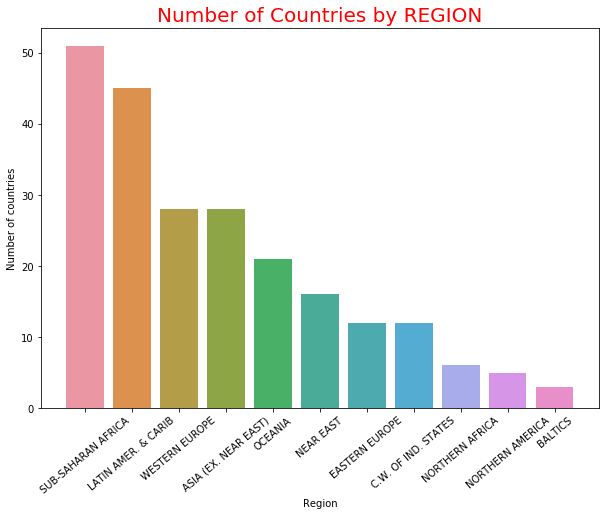

In [129]:
region = data["Region"].value_counts()

# 각 Region에 존재하는 value 수

plt.figure(figsize=(10,7))       # 그래프 가로, 세로 크기
sns.barplot(x=region.index, y=region.values)
plt.xticks(rotation=40)    # x값들을 90도 회전시킨것
plt.ylabel('Number of countries')   # y축 이름
plt.xlabel('Region')   # x축 이름
plt.title('Number of Countries by REGION', color = 'red', fontsize=20)   # 총 제목
plt.plot()

[]

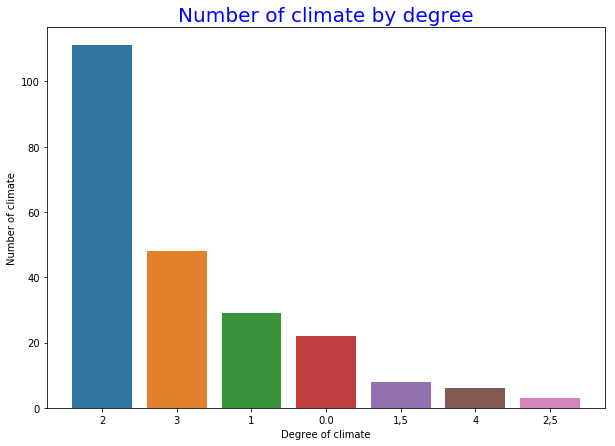

In [122]:
climate = data["Climate"].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=climate.index, y=climate.values)
plt.xticks(rotation=0)
plt.ylabel('Number of climate')
plt.xlabel('Degree of climate')
plt.title('Number of climate by degree', color = 'blue', fontsize = 20)
plt.plot()

### Box plot

In [130]:
group = data.groupby("Region")
group.mean()

,Population,Area (sq. mi.),GDP ($ per capita)
Region,,,
ASIA (EX. NEAR EAST),1.317137e+08,8.248826e+05,8053.571429
BALTICS,2.394991e+06,5.833833e+04,11300.000000
C.W. OF IND. STATES,2.334013e+07,1.841737e+06,4000.000000
EASTERN EUROPE,9.992893e+06,9.601850e+04,9808.333333
LATIN AMER. & CARIB,1.248499e+07,4.565352e+05,8682.222222
NEAR EAST,1.219177e+07,2.722241e+05,10456.250000
NORTHERN AFRICA,2.690119e+07,1.003148e+06,4550.000000
NORTHERN AMERICA,6.633446e+07,4.356494e+06,26100.000000
OCEANIA,1.577698e+06,4.057053e+05,8247.619048


[]

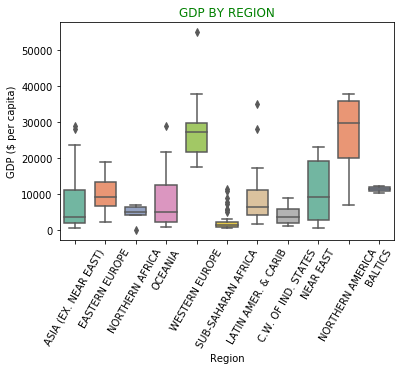

In [140]:
## GDP(수치형) & Region(범주형) 간의 관계를 나타내기 위해 box plot 사용
# palette : 색상 세트를 나타낸다.
# fliersize : 이상치들을 나타내는 점들의 크기


sns.boxplot(x=data["Region"], y=data["GDP ($ per capita)"], data=data, width=0.7, palette="Set2", fliersize = 5)
plt.xticks(rotation=60)
plt.title("GDP BY REGION", color = "green")
plt.plot()

In [141]:
group = data.groupby("Region")
group.mean()

,Population,Area (sq. mi.),GDP ($ per capita)
Region,,,
ASIA (EX. NEAR EAST),1.317137e+08,8.248826e+05,8053.571429
BALTICS,2.394991e+06,5.833833e+04,11300.000000
C.W. OF IND. STATES,2.334013e+07,1.841737e+06,4000.000000
EASTERN EUROPE,9.992893e+06,9.601850e+04,9808.333333
LATIN AMER. & CARIB,1.248499e+07,4.565352e+05,8682.222222
NEAR EAST,1.219177e+07,2.722241e+05,10456.250000
NORTHERN AFRICA,2.690119e+07,1.003148e+06,4550.000000
NORTHERN AMERICA,6.633446e+07,4.356494e+06,26100.000000
OCEANIA,1.577698e+06,4.057053e+05,8247.619048


[]

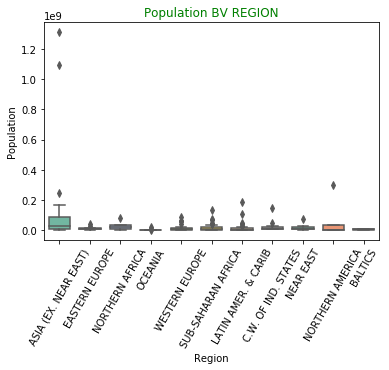

In [143]:
sns.boxplot(x=data["Region"], y=data["Population"], data=data, width=0.7, palette="Set2", fliersize = 5)
plt.xticks(rotation = 60)
plt.title("Population BV REGION", color = "green")
plt.plot()

### Dist plot

In [178]:
data["Deathrate"] = data["Deathrate"].astype(str)
data["Deathrate"] = data["Deathrate"].apply(convertValue)
data["GDP ($ per capita)"] = data["GDP ($ per capita)"].astype(str)
data["GDP ($ per capita)"] = data["GDP ($ per capita)"].apply(convertValue)
data["Birthrate"] = data["Birthrate"].astype(str)
data["Birthrate"] = data["Birthrate"].apply(convertValue)
data["GDP ($ per capita)"] = data["GDP ($ per capita)"].astype(str)
data["GDP ($ per capita)"] = data["GDP ($ per capita)"].apply(convertValue)

[]

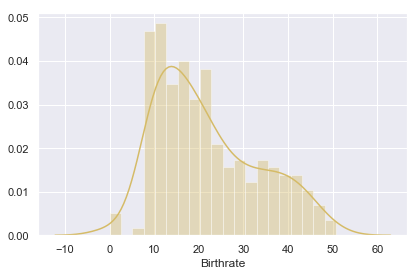

In [179]:
## bins : 막대상자 크기, kde : 꺽은선 그래프의 유무
# plt.tight_layout() : 최대한 그려진 그래프를 크게 표시하는 함수

sns.set(style="darkgrid", palette="muted",font_scale=1)
sns.distplot(data["Birthrate"],bins=20,kde=True,color="y")
plt.tight_layout()
plt.plot()

[]

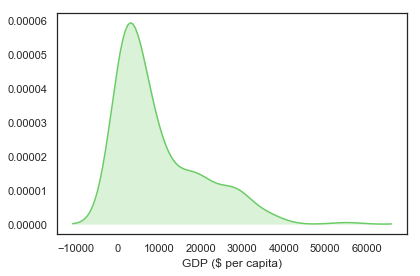

In [180]:
sns.set(style="white",palette="Blues", font_scale=1)
sns.distplot(data["GDP ($ per capita)"],hist=False,bins=20,kde=True,color="g",kde_kws={"shade":True})
plt.tight_layout()#Increases the alignment of the drawn graph.
plt.plot()

[]

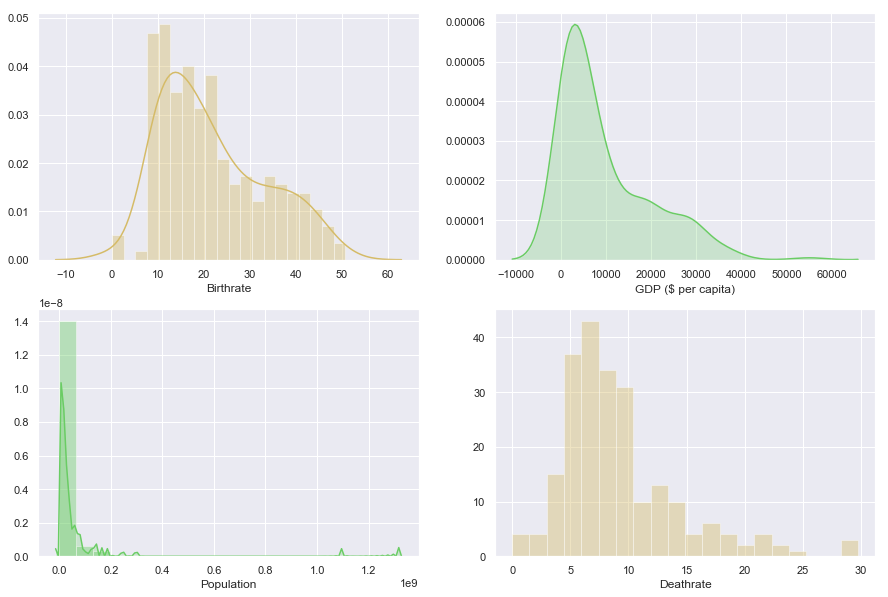

In [181]:
sns.set(style="darkgrid", palette="muted",font_scale=1)
f,axes=plt.subplots(2,2,figsize=(15,10))

sns.distplot(data["Birthrate"],bins=20,kde=True,color="y",ax=axes[0,0])
sns.distplot(data["GDP ($ per capita)"],hist=False,bins=20,kde=True,color="g",kde_kws={"shade":True},ax=axes[0,1])
sns.distplot(data["Population"],hist=True,bins=20,kde=True,color="g",kde_kws={"shade":True},ax=axes[1,0])
sns.distplot(data["Deathrate"],bins=20,kde=False,color="y",ax=axes[1,1])

plt.plot()

### Pair plot

[]

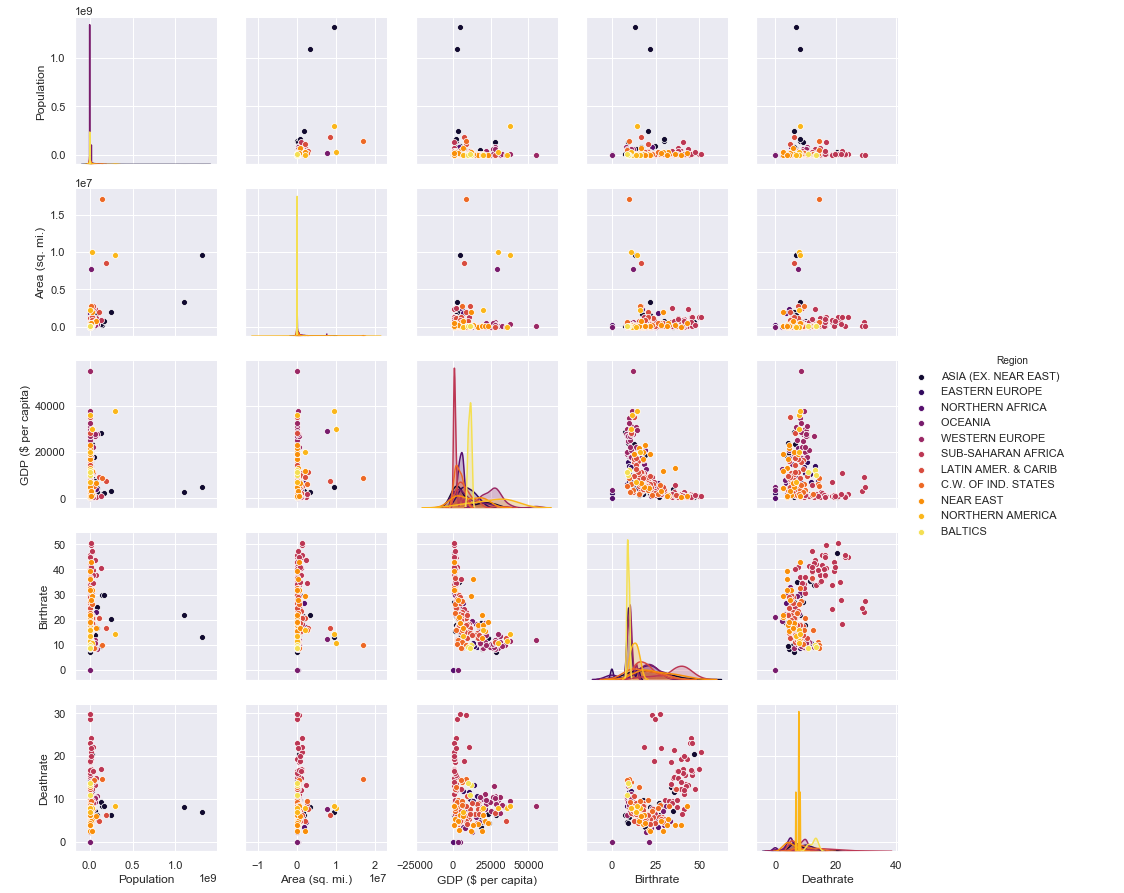

In [182]:
# hue 인수에 카테고리 변수 이름을 지정하여 카테고리 값에 따라 색상을 다르게 할 수 있다.

sns.pairplot(data,palette="inferno", hue="Region",)

plt.plot()

### Scatter plot

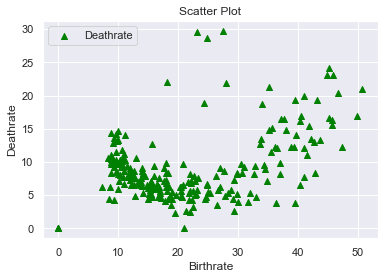

In [183]:
plt.scatter(data["Birthrate"],data["Deathrate"],marker='^',facecolor='green')

plt.grid(True)

plt.xlabel('Birthrate')
plt.ylabel('Deathrate')

plt.title("Scatter Plot")

plt.legend(loc='upper left')

plt.show()

### histogram

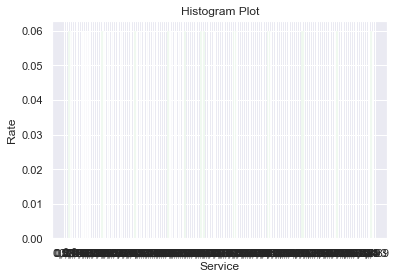

In [186]:
plt.hist(data["Service"], bins=10,density=True, facecolor='g', alpha=0.75)
plt.xlabel('Service')
plt.ylabel('Rate')
plt.title('Histogram Plot')
plt.grid(True)
plt.show()


## ? 왜 안돌아가는지 모르겠다.

### pie chart

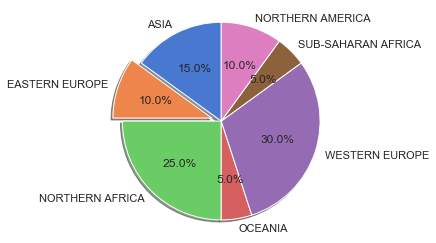

In [187]:
explode = (0, 0.1, 0, 0,0,0,0)

sizes=[15,10,25,5,30,5,10]

labels="ASIA","EASTERN EUROPE","NORTHERN AFRICA","OCEANIA","WESTERN EUROPE","SUB-SAHARAN AFRICA","NORTHERN AMERICA"

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()